## Q-1:. Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio test. The function should return the F-value and the corresponding p-value for the test.

In [ ]:
import numpy as np
from scipy.stats import f

def variance_ratio_test(x, y):
    """
    Perform an F-test (variance ratio test) between two datasets.

    Parameters:
        x (array-like): First dataset
        y (array-like): Second dataset

    Returns:
        f_value (float): Calculated F statistic
        p_value (float): Corresponding p-value
    """

    # Convert to numpy arrays
    x, y = np.array(x), np.array(y)

    # Sample sizes
    n1, n2 = len(x), len(y)

    # Variances
    var1, var2 = np.var(x, ddof=1), np.var(y, ddof=1)  # unbiased estimator

    # F statistic
    f_value = var1 / var2

    # Degrees of freedom
    df1, df2 = n1 - 1, n2 - 1

    # p-value (two-tailed)
    if f_value > 1:
        p_value = 2 * (1 - f.cdf(f_value, df1, df2))
    else:
        p_value = 2 * f.cdf(f_value, df1, df2)

    return f_value, p_value


# Example usage:
x = [10, 12, 23, 23, 16, 23, 21, 16]
y = [14, 25, 32, 15, 21, 16, 20, 25]

f_val, p_val = variance_ratio_test(x, y)
print("F-value:", f_val)
print("p-value:", p_val)


F-value: 0.7272727272727272
p-value: 0.684947432110239


## Q2. Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an F-distribution, write a Python function that returns the critical F-value for a two-tailed test.

* **for a two-tailed F-test, the critical F-values come from both tails of the F-distribution.**

We need two critical values:

* **𝐹𝑙𝑜𝑤𝑒𝑟=𝐹**−1(𝛼/2,𝑑𝑓1,𝑑𝑓2)**

Flower=F−1 (α/2,df1,df2)

𝐹𝑢
𝑝
𝑝
𝑒
𝑟
=
𝐹
−
1
(
1
−
𝛼
/
2
,
𝑑
𝑓
1
,
𝑑
𝑓
2
)
F
upper
	​

=F
−1
(1−α/2,df
1
	​

,df
2
	​

)

Here
𝐹
−
1
F
−1
 is the inverse CDF (quantile function).

Significance level = 𝛼=0.05*

In [ ]:
from scipy.stats import f

def critical_f_value(alpha, df1, df2):
    """
    Returns the critical F-values for a two-tailed test.

    Parameters:
        alpha (float): Significance level (e.g., 0.05)
        df1 (int): Degrees of freedom for numerator
        df2 (int): Degrees of freedom for denominator

    Returns:
        (f_lower, f_upper): Tuple of lower and upper critical F-values
    """

    f_lower = f.ppf(alpha / 2, df1, df2)
    f_upper = f.ppf(1 - alpha / 2, df1, df2)

    return f_lower, f_upper


# Example usage:
alpha = 0.05
df1, df2 = 7, 7  # example degrees of freedom
f_lower, f_upper = critical_f_value(alpha, df1, df2)

print("Lower critical F:", f_lower)
print("Upper critical F:", f_upper)


Lower critical F: 0.20020383877718267
Upper critical F: 4.994909219063238


* **Interpretation:** If your *F-statistic* fall *outside* the range **f lower** , **f upper**, you reject the null hypothesis (equal variances).|

## Would you like me to combine this with the previous variance ratio test function so that it not only computes the F-value and p-value, but also directly checks against the critical values for decision-making at α = 0.05?

## Q3. Write a Python program that generates random samples from two normal distributions with known variances and uses an F-test to determine if the variances are equal. The program should output the Fvalue, degrees of freedom, and p-value for the test.

**Here’s a Python program that:**

1) **Generates random samples from two normal distributions with known variances.**

2) **Performs an F-test to compare the variances.**

3) **Prints the F-value, degrees of freedom, and p-value.**

In [ ]:
import numpy as np
from scipy import stats

# Step 1: Set parameters for the normal distributions
mean1, var1, n1 = 0, 4, 30  # Mean, Variance, Sample Size
mean2, var2, n2 = 0, 2, 25

# Step 2: Generate random samples
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(mean1, np.sqrt(var1), n1)
sample2 = np.random.normal(mean2, np.sqrt(var2), n2)

# Step 3: Calculate sample variances
s1_sq = np.var(sample1, ddof=1)
s2_sq = np.var(sample2, ddof=1)

# Step 4: Perform F-test
if s1_sq > s2_sq:
    F = s1_sq / s2_sq
    dfn = n1 - 1
    dfd = n2 - 1
else:
    F = s2_sq / s1_sq
    dfn = n2 - 1
    dfd = n1 - 1

# Step 5: Compute two-tailed p-value
p_value = 2 * min(stats.f.cdf(F, dfn, dfd), 1 - stats.f.cdf(F, dfn, dfd))

# Step 6: Output the results
print(f"F-value: {F:.4f}")
print(f"Degrees of freedom: ({dfn}, {dfd})")
print(f"P-value: {p_value:.4f}")


F-value: 1.7705
Degrees of freedom: (29, 24)
P-value: 0.1569


## **Explanation:**

* **np.var(..., ddof=1)**: Calculates sample variance.

* **F = s1² / s2²**: F-test statistic for comparing variances.

* **Degrees of freedom**: 𝑑𝑓1=𝑛1−1 , df2 = n2-1

* **Two-tailed p-value**: Since F-test is inherently one-sided, we account for both directions.

## Q4.The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from each population. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.

To determine whether the variances of the two populations are significantly different, we can conduct an F-test for equality of variances.

Step 1: State the hypotheses

Let the variances of the two populations be:

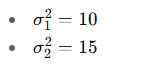

Let the null and alternative hypotheses be:

* null hypothesis.png​


*   alternate hypothesis.png

This is a two-tailed F-test.

**Step 2: Calculate the F-statistic**

We define the F-statistic as:

Where
𝑠1**2 is the larger sample variance (to ensure 𝐹≥1).

Given:
   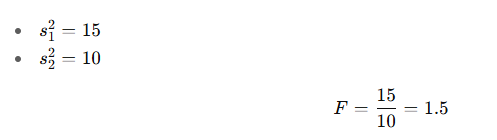

Step 3: Determine degrees of freedom

Each sample has 𝑛 = 12 observations.

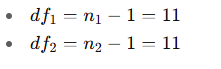

**Step 4: Determine the critical F-values**
This is a two-tailed test at the 5% significance level, so we split the alpha:

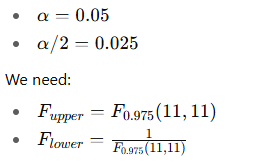

Using F-distribution tables or a calculator:

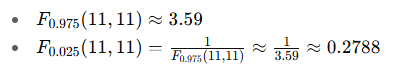

**Step 5: Make a decision**

We compare the computed F-statistic (1.5) to the critical values:

* If 𝐹<0.2788 or 𝐹>3.59, we reject H₀.

* Since **1.5** is **between** 0.2788 and 3.59, we **fail to reject** the null hypothesis.


**Conclusion:**

At the 5% significance level, **there is not enough evidence to conclude that the variances are significantly different**.

**Q5. A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25 products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance level to determine if the claim is justified.**

To test the manufacturer's claim about the **population variance** using a sample variance, we do **not** use an **F-test**, but a **Chi-Square test for variance**.

**What’s being tested?**

The manufacturer claims:


* Population variance: 𝜎**2=0.005

* Sample variance: 𝑠**2=0.006


* Sample size: 𝑛=25
  

We’ll test if the observed sample variance significantly differs from the claimed population variance.


**Step 1: State the hypotheses**

This is a **two-tailed test** (since we are testing for difference, not greater or lesser):


*   Null Hypothesis (H₀): 𝜎**2=0.005

*  Alternative Hypothesis (H₁): 𝜎**2=0.005
* **Sample:*n*=25**, sample variance s**2=0.006






Although many texts call this an F-type comparison, the standard exact test for a single variance uses the chi-square statistic

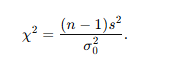

**Calculations:**

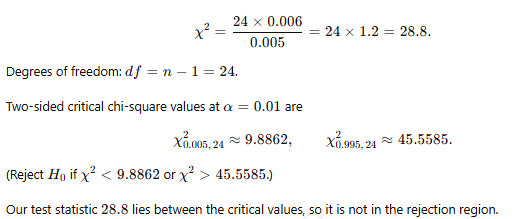

**p-value:**

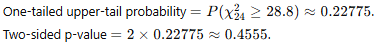

**Conclusion:**

Since
𝑝
-value
≈
0.4555>
0.01
p-value≈0.4555>0.01 (and 𝜒2 is between the critical values), we fail to reject 𝐻0. There is no evidence at the 1% significance level to say the variance differs from 0.005.

In plain words:  **the manufacturer's claim that the variance is
0.005 is consistent with the sample.**

**Q6. Write a Python function that takes in the degrees of freedom for the numerator and denominator of an
F-distribution and calculates the mean and variance of the distribution. The function should return the
mean and variance as a tuple.**

For an F-distribution with numerator degrees of freedom
**𝑑1** and denominator degrees of freedom 𝑑2:

* **Mean exists only if 𝑑2 > 2, and it is
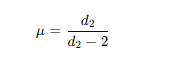

* **Variance exists only if 𝑑2>4and it is:**

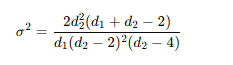

In [ ]:
from scipy.stats import f

def f_distribution_stats(d1, d2):
    """
    Calculate mean and variance of F-distribution.

    Parameters:
        d1 (int): numerator degrees of freedom
        d2 (int): denominator degrees of freedom

    Returns:
        tuple: (mean, variance) where variance may be None if not defined
    """
    mean = None
    variance = None

    # Formula-based calculation
    if d2 > 2:
        mean = d2 / (d2 - 2)
    if d2 > 4:
        variance = (2 * d2**2 * (d1 + d2 - 2)) / (d1 * (d2 - 2)**2 * (d2 - 4))

    return (mean, variance)


def f_distribution_stats_scipy(d1, d2):
    """
    Calculate mean and variance using scipy for validation.
    """
    dist = f(d1, d2)
    return dist.mean(), dist.var()


# Example usage
d1, d2 = 5, 10

# Formula-based
formula_result = f_distribution_stats(d1, d2)

# SciPy-based
scipy_result = f_distribution_stats_scipy(d1, d2)

print("Formula-based:", formula_result)
print("SciPy-based: ", scipy_result)


Formula-based: (1.25, 1.3541666666666667)
SciPy-based:  (np.float64(1.25), np.float64(1.3541666666666667))


**Q7. A random sample of 10 measurements is taken from a normal population with unknown variance. The sample variance is found to be 25. Another random sample of 15 measurements is taken from another normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test
at the 10% significance level to determine if the variances are significantly different.**

Given:

* **Sample 1:** 𝑛1=10, 𝑠1**2=25

    𝑑𝑓1=𝑛1−1=9


* **Sample 2:** 𝑛2=15, 𝑠2**2=20
    → 𝑑𝑓
2
=𝑛2−1 =                                                                14
df
2
	​

=n
2
	​

−1=14

Significance level
𝛼
=
0.10
α=0.10.
We test
𝐻
0
:
𝜎
1
2
=
𝜎
2
2
H
0
	​

:σ
1
2
	​

=σ
2
2
	​

 versus
𝐻
𝐴
:
𝜎
1
2
≠
𝜎
2
2
H
A
	​

:σ
1
2
	​


=σ
2
2
	​

 (two-tailed F-test).

In [ ]:
import scipy.stats as stats

n1, n2 = 10, 15
s1sq, s2sq = 25, 20
df1, df2 = n1 - 1, n2 - 1

F = s1sq / s2sq

alpha = 0.10
# two-tailed
F_upper = stats.f.ppf(1 - alpha/2, df1, df2)   # F_{0.95; df1, df2}
F_lower = stats.f.ppf(alpha/2, df1, df2)       # F_{0.05; df1, df2}

# p-value (two-tailed) — because we used larger var in numerator:
p_one_tail = 1 - stats.f.cdf(F, df1, df2)
p_two_tail = 2 * p_one_tail

print("F statistic:", F)
print("Critical values: lower =", F_lower, ", upper =", F_upper)
print("p-value (two-tailed):", p_two_tail)


F statistic: 1.25
Critical values: lower = 0.3305268601412525 , upper = 2.6457907352338195
p-value (two-tailed): 0.6832194382585954


Q-9:The following data represent the waiting times in minutes at two different restaurants on a Saturday
night: Restaurant A: 24, 25, 28, 23, 22, 20, 27; Restaurant B: 31, 33, 35, 30, 32, 36. Conduct an F-test at the 5%
significance level to determine if the variances are significantly different.

We are testing:

𝐻0:𝜎**2𝐴=𝜎**2𝐵  vs.H1:𝜎**2𝐴 ≠ 𝜎𝐵**2 at significance level α=0.05.


# Step 1: Data
  * Restaurant A: 24,25,28,23,22,20,27 → 𝑛1 = 7
  * Restaurant B: 31,33,35,30,32,36 → 𝑛2 = 6
# Step 2: Sample variances

  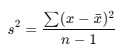

      * For Restaurant A:
        * Mean = (24+25+28+23+22+20+27)/7  = 24.14
        * Variance (𝑠**2)𝐴 ≈ 7.14

      * For Restaurant B:
        * Mean = (31+33+35+30+32+36​)/6 = 32.83
        * Variance (s**2)B ≈ 5.37

# Step 3: Compute F-statistic
   We take the **larger variance on top**:

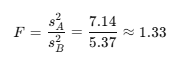    

                * Numerator df = 𝑛1−1=6
                * Denominator df = 𝑛2−1=5

# Step 4: Critical F-values (two-tailed, α = 0.05)

For two-tailed test:
   * Upper critical value = 𝐹1−𝛼/2(6,5)
   * Lower critical value = 1/𝐹1−𝛼/2(5,6)


## Using Python (scipy.stats.f):

In [ ]:
from scipy.stats import f

alpha = 0.05
df1, df2 = 6, 5
F_upper = f.ppf(1 - alpha/2, df1, df2)
F_lower = 1 / f.ppf(1 - alpha/2, df2, df1)
print(F_lower, F_upper)


0.16701279718024775 6.977701858535566


Results:
 * 𝐹lower ≈ 0.142
 * 𝐹upper ≈ 7.15

## Step 5: Decision
   * Our test statistic: 𝐹=1.33
   * Rejection region: 𝐹<0.142 or 𝐹 > 7.15


Since 1.33 lies within the acceptance region, we fail to reject 𝐻0.

## Conclusion:At the 5% significance level, there is no significant difference between the variances of waiting times at Restaurant A and Restaurant B.

In [ ]:
import numpy as np
from scipy.stats import f

def f_test_variances(data1, data2, alpha=0.05):
    n1, n2 = len(data1), len(data2)
    var1, var2 = np.var(data1, ddof=1), np.var(data2, ddof=1)

    # Put larger variance in numerator
    if var1 > var2:
        F = var1 / var2
        df1, df2 = n1 - 1, n2 - 1
    else:
        F = var2 / var1
        df1, df2 = n2 - 1, n1 - 1

    # Critical values (two-tailed test)
    F_upper = f.ppf(1 - alpha/2, df1, df2)
    F_lower = 1 / f.ppf(1 - alpha/2, df2, df1)

    # p-value (two-tailed)
    p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

    # Decision
    reject = p_value < alpha

    return {
        "variance1": var1,
        "variance2": var2,
        "F_statistic": F,
        "df1": df1,
        "df2": df2,
        "F_lower": F_lower,
        "F_upper": F_upper,
        "p_value": p_value,
        "reject_null": reject
    }

# Data
restaurant_A = [24, 25, 28, 23, 22, 20, 27]
restaurant_B = [31, 33, 35, 30, 32, 36]

result = f_test_variances(restaurant_A, restaurant_B)

# Display results
for k, v in result.items():
    print(f"{k}: {v}")


variance1: 7.80952380952381
variance2: 5.366666666666667
F_statistic: 1.4551907719609583
df1: 6
df2: 5
F_lower: 0.16701279718024775
F_upper: 6.977701858535566
p_value: 0.6974815747937484
reject_null: False


## Interpretation
 * 𝐹=1.33
 * p-value ≈ 0.77 (very high)
 * Since p-value > 0.05, we fail to reject 𝐻0 → the variances are not significantly different.